<a href="https://colab.research.google.com/github/aldegundescastro/Bootcamp-Machine-Learning-Training/blob/main/desafio_rbg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redução de Dimensionalidade em Imagens para Redes Neurais

### Objetivo: Transformar uma imagem colorida para níveis de cinza (0 a 255) e para binarizada (0 e 255), preto e branco utilizando linguagem Python.


#### O sistema RGB utiliza as três cores primárias, vermelho (Red), verde (Green) e azul (Blue), as quais são convertidas em valores que variam de 0 a 255.
#### As cores primarias são obtidas a partir da intensidade máxima de cada componente individual sendo o vermelho puro representado por (255, 0, 0), o verde por (0, 255, 0) e o azul por (0, 0, 255). Já as demais cores são criadas pela combinação dessas. Ao somar as três em suas intensidades máximas (255, 255, 255), obtém-se a cor branca, e ao combiná-las em suas intensidades mínimas (0, 0, 0), obtém-se a cor preta.  

#### Para transformar uma imagem colorida em níveis de cinza é necessário realizar uma transformação na matriz de cores, equalizando cada componente RGB com base na sua intensidade. O padrão "ITU-R BT.601"  que utiliza a formula "Y=0.299⋅R+0.587⋅G+0.114⋅B" e o padrão "ITU-R BT.709" que apresenta formula "Y=0.2126⋅R+0.7152⋅G+0.0722⋅B" são soluções consolidadas na fotografia e no cinema, para cada pixel da imagem é realizado o somatório do componente RGB multiplicado por seu respectivo peso.

#### Já na construção da imagem binarizada a imgem convertida em níveis de cinza passa por um filtro que atribui valor 0 (preto) ao pixel analisaso caso o nivel de cinza seja menor que um determinado limiar, caso contrário o valor 255 (branca) é atribuido, o limiar costuma ser definido como 127 ou 128.


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import requests
import os

In [ ]:
url = "https://upload.wikimedia.org/wikipedia/commons/3/3a/Cat03.jpg"
path = "./imagem.jpg"
response = requests.get(url)
with open(path, "wb") as f:
    f.write(response.content)


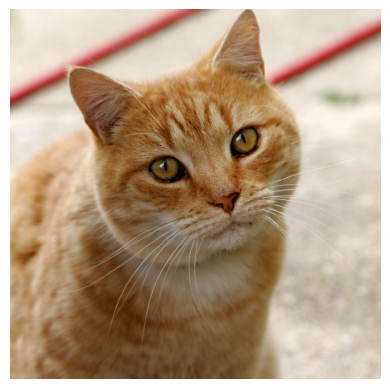

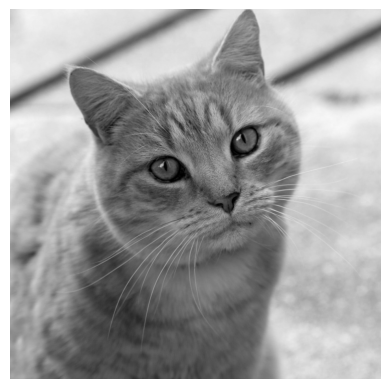

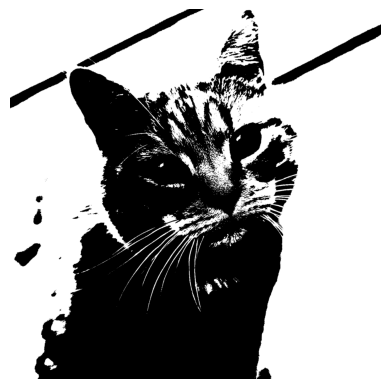

In [ ]:
imagem = Image.open(path).convert("RGB")

# Obter largura e altura
largura, altura = imagem.size

# Criar nova imagem para armazenar o resultado
imagem_cinza = Image.new("RGB", (largura, altura))
# Criar imagem de saída "1" = modo binário (preto e branco)
imagem_pb = Image.new("1", (largura, altura))

# Definir um limiar (threshold)
limiar = 128  # valor entre 0 e 255

# Percorrer cada pixel
for x in range(largura):
    for y in range(altura):
        r, g, b = imagem.getpixel((x, y))
        # Média ponderada para tom de cinza (luminosidade)
        cinza = int(0.299 * r + 0.587 * g + 0.114 * b)
        #cinza = int(0.2126 * r + 0.7152 * g + 0.0722 * b)
        imagem_cinza.putpixel((x, y), (cinza, cinza, cinza))
        # Preto ou branco conforme o limiar
        cor_binaria = 255 if cinza > limiar else 0
        imagem_pb.putpixel((x, y), cor_binaria)

plt.imshow(imagem)
plt.axis('off')
plt.show()

plt.imshow(imagem_cinza)
plt.axis('off')
plt.show()

plt.imshow(imagem_pb)
plt.axis('off')
plt.show()